In [23]:
%pylab inline
%matplotlib inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/home/telepchu/PycharmProjects/project-1-telepchuk-maternik/venv/lib64/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
import sys
import time
from argparse import Namespace

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pyro
import seaborn
from pomegranate import BayesianNetwork
from sklearn import metrics as sk_mtr

from src.run_research import run_research
from src.CategoricalNB import CategoricalNB
from src.data import get_corr, plot_corr
from src.data import get_factorized_dataset, split_dataset
from src.pgm import PGM

pyro.enable_validation(True)
sys.path.append('.')
seaborn.set_style('whitegrid')

In [25]:
dataset = pd.read_csv('./data/agaricus-lepiota.csv').astype('category')
dataset = dataset.replace({'?' : np.nan})

In [26]:
nrow, ncol = dataset.shape
nrow, ncol

(8124, 23)

In [27]:
dataset.head(10)

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises?                  8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                5644 non-null   object  
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [29]:
dataset.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [30]:
bool_series = pd.isnull(dataset["stalk-root"])
dataset[bool_series]

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [31]:
dataset['stalk-root'].isnull().sum()/ nrow

0.3052683407188577

In [32]:
set(dataset['veil-type'])

{'p'}

In [33]:
f_dataset = dataset.apply(lambda x: pd.factorize(x)[0]).astype('category')
f_dataset = df1 = f_dataset.drop(['stalk-root', 'veil-type'], axis=1)
f_dataset.head(10)

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,1,2
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,0,2
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,3,1
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,2


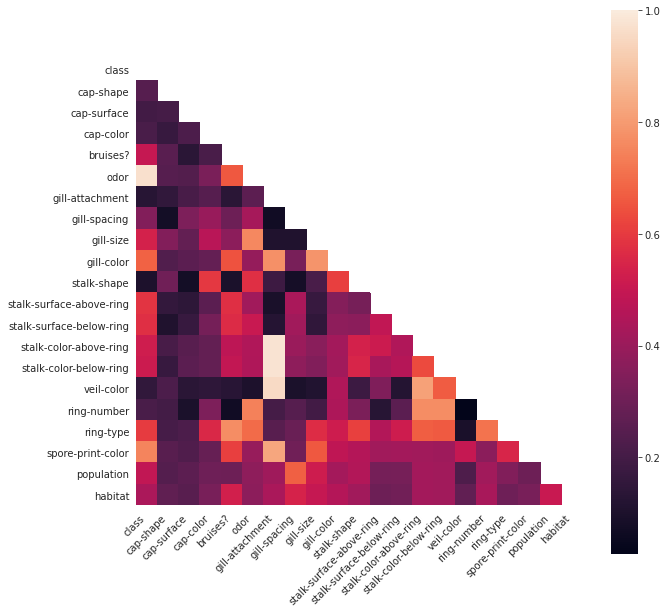

In [34]:
dataset = get_factorized_dataset()
corr = get_corr(dataset)
plot_corr(corr)

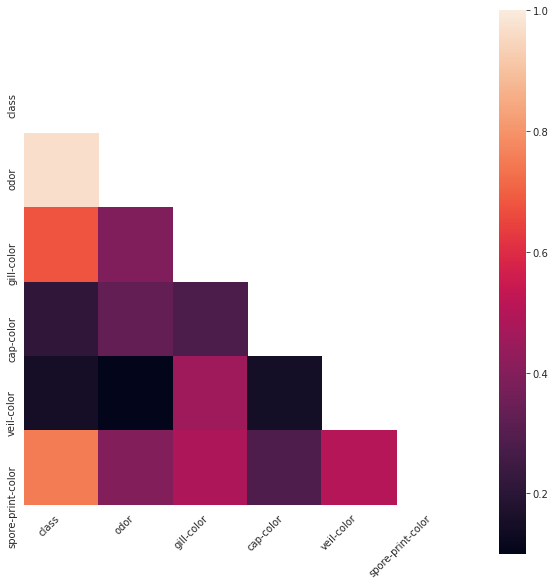

In [35]:
corr = get_corr(dataset.get(['class','odor','gill-color','cap-color','veil-color','spore-print-color']))
plot_corr(corr)

In [36]:
dataset = get_factorized_dataset()
dataset.head(10)
data = split_dataset(dataset,0.8)

In [37]:
pyro.clear_param_store()

clf = CategoricalNB(
    num_epochs=20,
    lr=0.05,
    verbose=True,
)

Loss = 204834.94360351562
Loss = 186164.9169921875
Loss = 172211.80419921875
Loss = 157449.943359375
Loss = 148749.17779541016
Loss = 141815.00439453125
Loss = 134891.00830078125
Loss = 131096.07550048828
Loss = 128206.74307250977



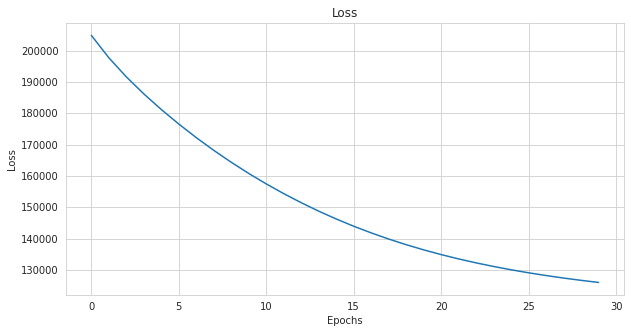

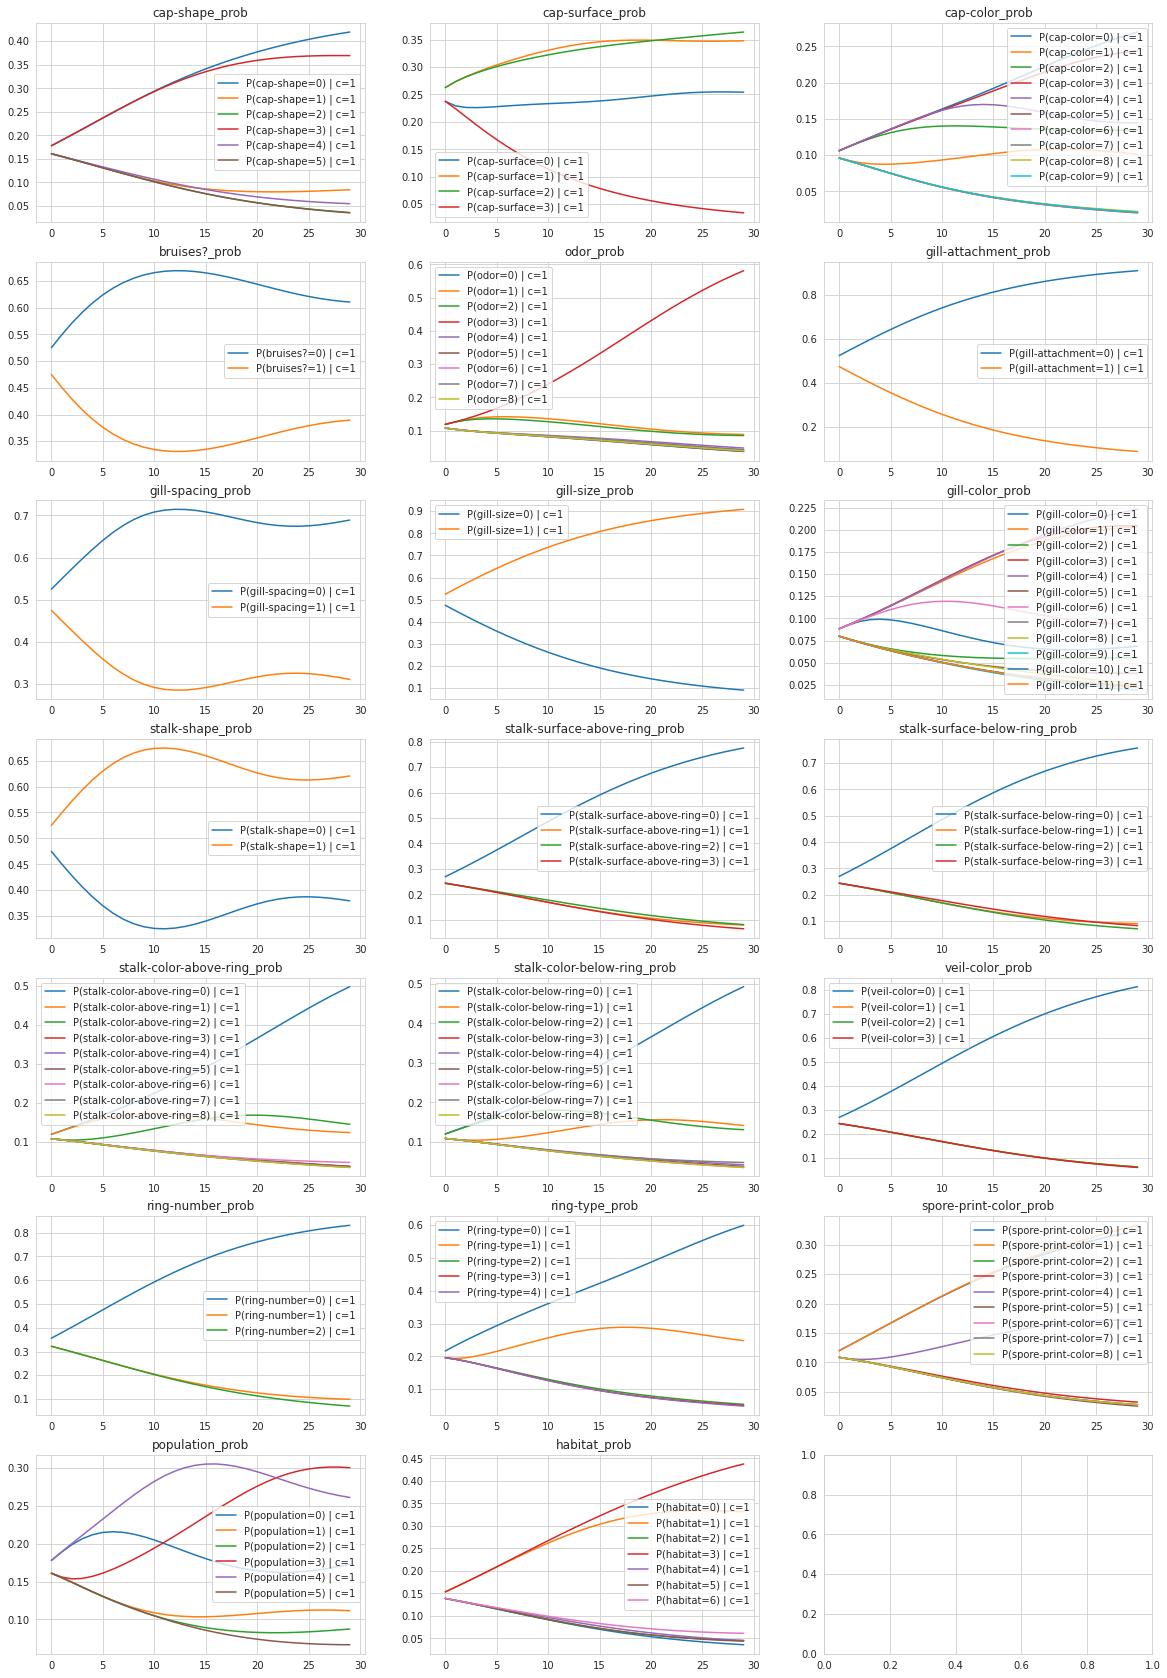

In [38]:
clf.fit(X=data['train']['X'], y=data['train']['y'])

In [39]:
for tt in ('train', 'test'):
    print(tt)
    print(sk_mtr.classification_report(
        y_true=data[tt]['y'],
        y_pred=clf.predict(X=data[tt]['X']),
    ))

train
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3133
           1       0.93      0.97      0.95      3366

    accuracy                           0.94      6499
   macro avg       0.95      0.94      0.94      6499
weighted avg       0.94      0.94      0.94      6499

test
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       783
           1       0.92      0.96      0.94       842

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [40]:
dataset = get_factorized_dataset().get(
    ['odor',
     'class',
     'spore-print-color',
     'gill-color',
     'cap-color',
     'cap-shape',
     'cap-surface',
     'gill-size',
     'gill-spacing',
     'gill-attachment',
     'stalk-color-above-ring',
     'stalk-surface-above-ring',
     'stalk-surface-below-ring',
     'stalk-shape'])

DAG=nx.DiGraph()

edges = [
    ('odor','class'),
    ('spore-print-color','class'),
    ('gill-color','class'),
    ('cap-color','class'),
    ('cap-shape','cap-color'),
    ('cap-surface','cap-color'),
    ('gill-size','gill-color'),
    ('gill-spacing','gill-color'),
    ('gill-attachment','gill-color'),
    ('stalk-color-above-ring','class'),
    ('stalk-surface-below-ring','stalk-color-above-ring'),
    ('stalk-surface-above-ring','stalk-color-above-ring'),
    ('stalk-shape','stalk-color-above-ring')
]
DAG.add_edges_from(edges)

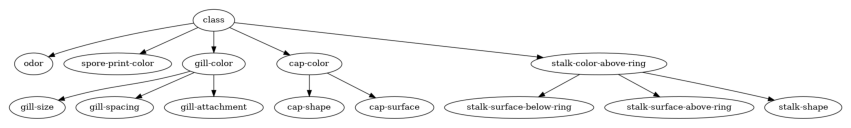

In [41]:
plt.figure(figsize=(15,10))
m = BayesianNetwork()
for o,d in edges:
    m.add_edge(Namespace(name=d),Namespace(name=o))
m.plot()

In [42]:
msk = np.random.rand(len(dataset)) < 0.8
train_data = dataset[msk]
test_data = dataset[~msk]

In [43]:
pgm = PGM(df=dataset, graph=DAG)
pgm.fit(train_data,epochs=20)
pgm.print_statistics(train_data,test_data)


/home/telepchu/PycharmProjects/project-1-telepchuk-maternik/venv/lib64/python3.7/site-packages/pyro/infer/traceenum_elbo.py:310: UserWarning: TraceEnum_ELBO found no sample sites configured for enumeration. If you want to enumerate sites, you need to @config_enumerate or set infer={"enumerate": "sequential"} or infer={"enumerate": "parallel"}? If you do not want to enumerate, consider using Trace_ELBO instead.
  warnings.warn('TraceEnum_ELBO found no sample sites configured for enumeration. '


Loss = 136231.953125
Loss = 122449.90625
Loss = 111805.0234375
Loss = 103882.1171875
Loss = 98303.7109375
Loss = 93042.3828125
Loss = 90904.625
Loss = 89499.078125
Loss = 88587.0

train
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3159
           1       0.96      0.96      0.96      3392

    accuracy                           0.96      6551
   macro avg       0.96      0.96      0.96      6551
weighted avg       0.96      0.96      0.96      6551

test
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       757
           1       0.96      0.97      0.96       816

    accuracy                           0.96      1573
   macro avg       0.96      0.96      0.96      1573
weighted avg       0.96      0.96      0.96      1573



In [44]:
dataset = get_factorized_dataset()

In [45]:
def analyze_data(data,epochs=20,algorithm='chow-liu'):
    pgm = PGM(data)
    tic = time.time()
    m = BayesianNetwork.from_samples(data,algorithm='chow-liu',state_names=data.columns)
    print("Time (s): ", time.time() - tic)

    pgm.import_pomegranate_model(m,data.columns)
    plt.figure(figsize=(15,10))
    m.plot()

    msk = np.random.rand(len(data)) < 0.8
    train_data = data[msk]
    test_data = data[~msk]

    pgm.fit(train_data,epochs=epochs)
    pgm.print_statistics(train_data,test_data)


Time (s):  1.3099400997161865
Loss = 205087.390625
Loss = 181110.28125
Loss = 161687.640625
Loss = 146260.515625
Loss = 134524.328125
Loss = 122533.5
Loss = 117316.859375
Loss = 113702.484375
Loss = 111237.171875

train
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3133
           1       0.94      0.96      0.95      3374

    accuracy                           0.95      6507
   macro avg       0.95      0.95      0.95      6507
weighted avg       0.95      0.95      0.95      6507

test
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       783
           1       0.93      0.96      0.95       834

    accuracy                           0.94      1617
   macro avg       0.94      0.94      0.94      1617
weighted avg       0.94      0.94      0.94      1617



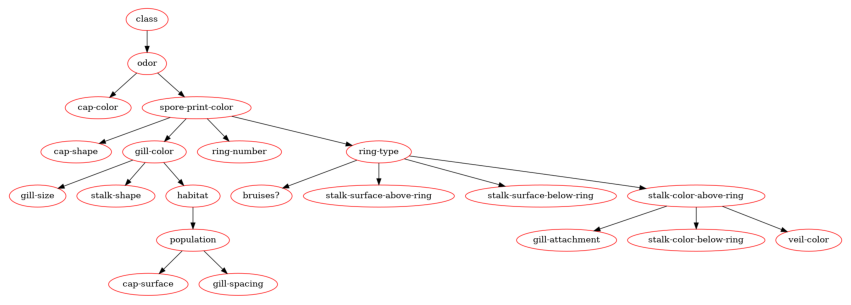

In [46]:
analyze_data(dataset)

Time (s):  1.045649766921997
Loss = 190144.765625
Loss = 168218.609375
Loss = 150655.640625
Loss = 136867.34375
Loss = 126523.03125
Loss = 116125.203125
Loss = 111652.03125
Loss = 108577.28125
Loss = 106498.59375

train
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3139
           1       0.80      0.83      0.82      3346

    accuracy                           0.81      6485
   macro avg       0.81      0.81      0.81      6485
weighted avg       0.81      0.81      0.81      6485

test
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       777
           1       0.78      0.83      0.81       862

    accuracy                           0.79      1639
   macro avg       0.79      0.79      0.79      1639
weighted avg       0.79      0.79      0.79      1639



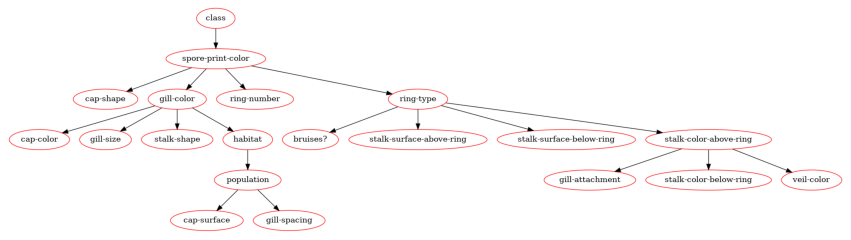

In [47]:
analyze_data(dataset.drop(['odor'],axis=1))

In [48]:
run_research(dataset)

##### Bayesian Net #2 #####

Loss = 190555.265625
Loss = 168560.234375
Loss = 150932.75
Loss = 137071.765625
Loss = 126669.3125
Loss = 116210.2109375
Loss = 111705.078125
Loss = 108610.3359375
Loss = 106523.59375

{'avg_fscore': [0, 0], 'avg_precision': [0, 0], 'avg_recall': [0, 0], 'avg_accuracy': 0}
##### Bayesian Net #3 #####

Loss = 135150.578125
Loss = 121485.234375
Loss = 110934.03125
Loss = 103074.265625
Loss = 97533.75
Loss = 92295.9765625
Loss = 90156.5625
Loss = 88753.3359375
Loss = 87850.2578125

{'avg_fscore': [0, 0], 'avg_precision': [0, 0], 'avg_recall': [0, 0], 'avg_accuracy': 0}
##### Bayesian Net #2 #####

Loss = 190555.265625
Loss = 167822.828125
Loss = 149734.671875
Loss = 135759.796875
Loss = 125178.8984375
Loss = 114339.078125
Loss = 109648.2109375
Loss = 106392.6953125
Loss = 104169.703125

Loss = 190555.265625
Loss = 168618.265625
Loss = 150854.546875
Loss = 136857.015625
Loss = 126173.0703125
Loss = 115384.125
Loss = 110830.4609375
Loss = 107749.234375
Loss = 10

/home/telepchu/PycharmProjects/project-1-telepchuk-maternik/venv/lib64/python3.7/site-packages/pyro/infer/traceenum_elbo.py:310: UserWarning: TraceEnum_ELBO found no sample sites configured for enumeration. If you want to enumerate sites, you need to @config_enumerate or set infer={"enumerate": "sequential"} or infer={"enumerate": "parallel"}? If you do not want to enumerate, consider using Trace_ELBO instead.
  warnings.warn('TraceEnum_ELBO found no sample sites configured for enumeration. '
/home/telepchu/PycharmProjects/project-1-telepchuk-maternik/venv/lib64/python3.7/site-packages/pyro/infer/traceenum_elbo.py:310: UserWarning: TraceEnum_ELBO found no sample sites configured for enumeration. If you want to enumerate sites, you need to @config_enumerate or set infer={"enumerate": "sequential"} or infer={"enumerate": "parallel"}? If you do not want to enumerate, consider using Trace_ELBO instead.
  warnings.warn('TraceEnum_ELBO found no sample sites configured for enumeration. '
/hom